In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/company2.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


In [ ]:
def ms(data , dep, st):
    s=data[(data['Store']==st) &( data['Dept']==dep)]['Weekly_Sales']
    return s

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input, RepeatVector, TimeDistributed
from keras.models import Model
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
def fcasts(data,dep,st,ep):
  df=ms(data,dep,st)
  df=df.array.reshape(-1,1)
  i=52
  ts=int(len(df)*0.75)

  scaler.fit(df)
  sdf=scaler.transform(df)
  gen=TimeseriesGenerator(sdf,sdf,length=i,batch_size=1)
  model = Sequential()
  model.add(LSTM(100, activation='relu', input_shape=(i, 1), return_sequences=True))
  model.add(LSTM(100, activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  # Store the training history
  history = model.fit(gen,epochs=ep,verbose=2)
  train_predictions = []
  first_eval_batch = sdf[:i]
  current_batch = first_eval_batch.reshape((1, i, 1))

  for i in range(len(df)):

      # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]

      # append the prediction into the array
      train_predictions.append(current_pred)

      # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

  true_predictions = scaler.inverse_transform(train_predictions)
  plt.plot(true_predictions,'r',label='Predictions')
  plt.plot(df,'y',label='Observed')
  fs=[]
  f_pred_batch=sdf[-i:]
  cbatch=f_pred_batch.reshape((1, i, 1))
  #we have to forecast for 6 months,i.e,24 weeks
  for i in range(24):
    current_pred = model.predict(cbatch)[0]
    fs.append(current_pred)
    cbatch = np.append(cbatch[:,1:,:],[[current_pred]],axis=1)
  tfs=scaler.inverse_transform(fs)
  plt.plot(range(len(df),len(df)+24),tfs,'g',label='Forecasts')
  plt.show()
  return model, history # Return both the model and the history object

Epoch 1/150
91/91 - 18s - loss: 0.0462 - 18s/epoch - 195ms/step
Epoch 2/150
91/91 - 10s - loss: 0.0423 - 10s/epoch - 105ms/step
Epoch 3/150
91/91 - 7s - loss: 0.0430 - 7s/epoch - 72ms/step
Epoch 4/150
91/91 - 7s - loss: 0.0406 - 7s/epoch - 81ms/step
Epoch 5/150
91/91 - 6s - loss: 0.0406 - 6s/epoch - 65ms/step
Epoch 6/150
91/91 - 5s - loss: 0.0430 - 5s/epoch - 60ms/step
Epoch 7/150
91/91 - 7s - loss: 0.0426 - 7s/epoch - 78ms/step
Epoch 8/150
91/91 - 5s - loss: 0.0406 - 5s/epoch - 60ms/step
Epoch 9/150
91/91 - 7s - loss: 0.0407 - 7s/epoch - 80ms/step
Epoch 10/150
91/91 - 5s - loss: 0.0400 - 5s/epoch - 60ms/step
Epoch 11/150
91/91 - 7s - loss: 0.0391 - 7s/epoch - 77ms/step
Epoch 12/150
91/91 - 6s - loss: 0.0400 - 6s/epoch - 66ms/step
Epoch 13/150
91/91 - 6s - loss: 0.0407 - 6s/epoch - 61ms/step
Epoch 14/150
91/91 - 9s - loss: 0.0380 - 9s/epoch - 95ms/step
Epoch 15/150
91/91 - 5s - loss: 0.0387 - 5s/epoch - 59ms/step
Epoch 16/150
91/91 - 5s - loss: 0.0381 - 5s/epoch - 59ms/step
Epoch 17/15

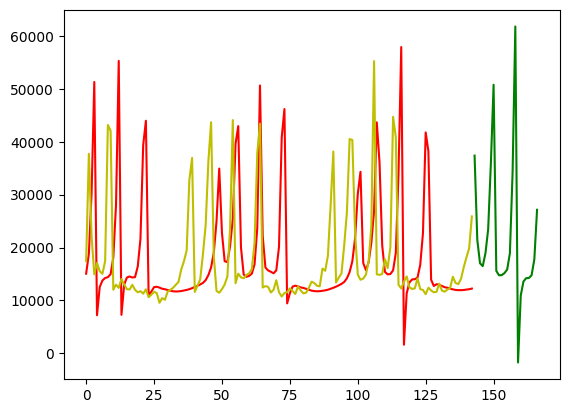

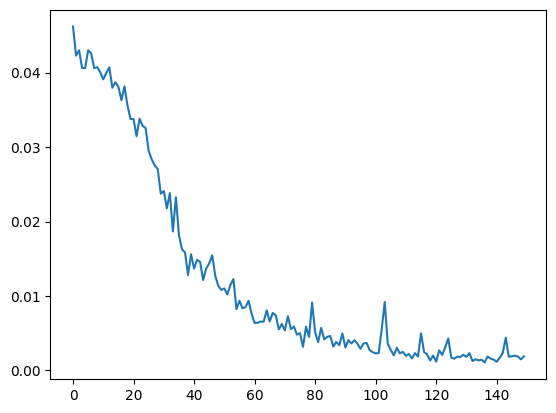

In [ ]:
#forecasting for dept 1 store 1
model, history = fcasts(data,1,1,150) # Unpack the returned values into two variables
loss_per_epoch = history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.show()

Epoch 1/150
91/91 - 8s - loss: 0.0395 - 8s/epoch - 89ms/step
Epoch 2/150
91/91 - 7s - loss: 0.0349 - 7s/epoch - 79ms/step
Epoch 3/150
91/91 - 5s - loss: 0.0353 - 5s/epoch - 57ms/step
Epoch 4/150
91/91 - 5s - loss: 0.0339 - 5s/epoch - 58ms/step
Epoch 5/150
91/91 - 7s - loss: 0.0348 - 7s/epoch - 78ms/step
Epoch 6/150
91/91 - 5s - loss: 0.0352 - 5s/epoch - 57ms/step
Epoch 7/150
91/91 - 6s - loss: 0.0345 - 6s/epoch - 64ms/step
Epoch 8/150
91/91 - 8s - loss: 0.0340 - 8s/epoch - 91ms/step
Epoch 9/150
91/91 - 5s - loss: 0.0346 - 5s/epoch - 57ms/step
Epoch 10/150
91/91 - 5s - loss: 0.0346 - 5s/epoch - 56ms/step
Epoch 11/150
91/91 - 6s - loss: 0.0337 - 6s/epoch - 65ms/step
Epoch 12/150
91/91 - 5s - loss: 0.0335 - 5s/epoch - 56ms/step
Epoch 13/150
91/91 - 7s - loss: 0.0337 - 7s/epoch - 75ms/step
Epoch 14/150
91/91 - 6s - loss: 0.0354 - 6s/epoch - 63ms/step
Epoch 15/150
91/91 - 5s - loss: 0.0335 - 5s/epoch - 56ms/step
Epoch 16/150
91/91 - 7s - loss: 0.0325 - 7s/epoch - 76ms/step
Epoch 17/150
91/9

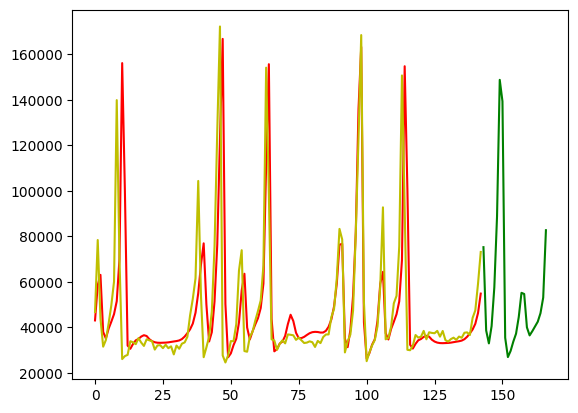

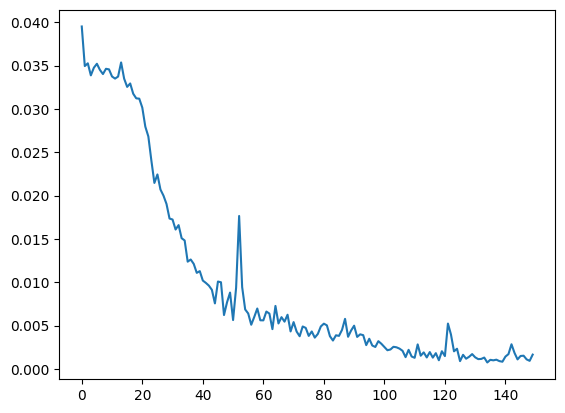

In [ ]:
model, history = fcasts(data,1,2,150) # Unpack the returned values into two variables
loss_per_epoch = history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.show()

Epoch 1/7
91/91 - 16s - loss: 0.0298 - 16s/epoch - 176ms/step
Epoch 2/7
91/91 - 15s - loss: 0.0294 - 15s/epoch - 161ms/step
Epoch 3/7
91/91 - 13s - loss: 0.0277 - 13s/epoch - 145ms/step
Epoch 4/7
91/91 - 7s - loss: 0.0278 - 7s/epoch - 74ms/step
Epoch 5/7
91/91 - 8s - loss: 0.0276 - 8s/epoch - 83ms/step
Epoch 6/7
91/91 - 8s - loss: 0.0272 - 8s/epoch - 88ms/step
Epoch 7/7
91/91 - 6s - loss: 0.0262 - 6s/epoch - 65ms/step
1/1 [==============================] - 0s 130ms/step


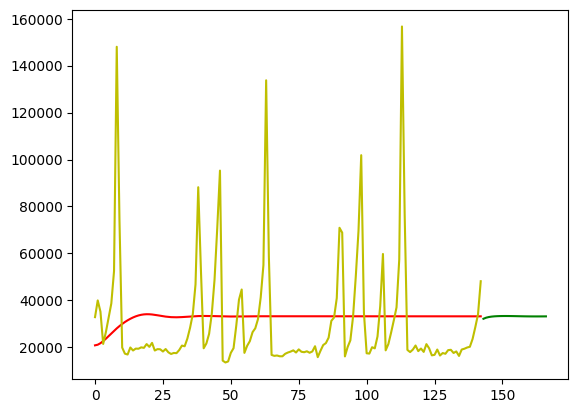

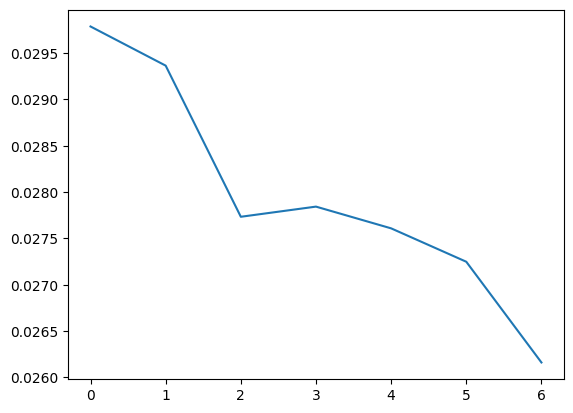

In [ ]:
model, history = fcasts(data,1,3,7) # Unpack the returned values into two variables
loss_per_epoch = history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.show()

Epoch 1/200
91/91 - 10s - loss: 0.0276 - 10s/epoch - 106ms/step
Epoch 2/200
91/91 - 5s - loss: 0.0221 - 5s/epoch - 58ms/step
Epoch 3/200
91/91 - 7s - loss: 0.0224 - 7s/epoch - 78ms/step
Epoch 4/200
91/91 - 6s - loss: 0.0225 - 6s/epoch - 71ms/step
Epoch 5/200
91/91 - 5s - loss: 0.0217 - 5s/epoch - 57ms/step
Epoch 6/200
91/91 - 7s - loss: 0.0219 - 7s/epoch - 76ms/step
Epoch 7/200
91/91 - 5s - loss: 0.0234 - 5s/epoch - 57ms/step
Epoch 8/200
91/91 - 5s - loss: 0.0224 - 5s/epoch - 55ms/step
Epoch 9/200
91/91 - 7s - loss: 0.0217 - 7s/epoch - 79ms/step
Epoch 10/200
91/91 - 5s - loss: 0.0225 - 5s/epoch - 57ms/step
Epoch 11/200
91/91 - 5s - loss: 0.0227 - 5s/epoch - 57ms/step
Epoch 12/200
91/91 - 5s - loss: 0.0216 - 5s/epoch - 58ms/step
Epoch 13/200
91/91 - 5s - loss: 0.0229 - 5s/epoch - 56ms/step
Epoch 14/200
91/91 - 7s - loss: 0.0221 - 7s/epoch - 75ms/step
Epoch 15/200
91/91 - 5s - loss: 0.0219 - 5s/epoch - 59ms/step
Epoch 16/200
91/91 - 5s - loss: 0.0217 - 5s/epoch - 56ms/step
Epoch 17/200
9

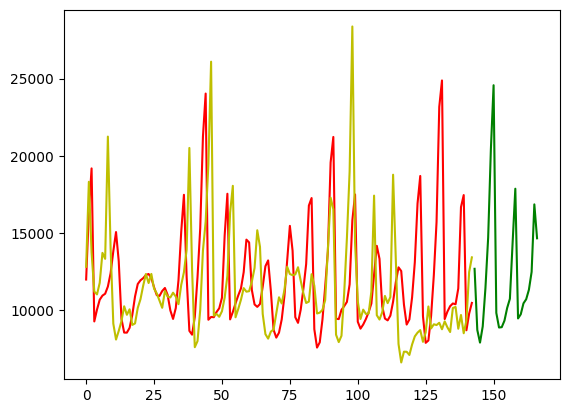

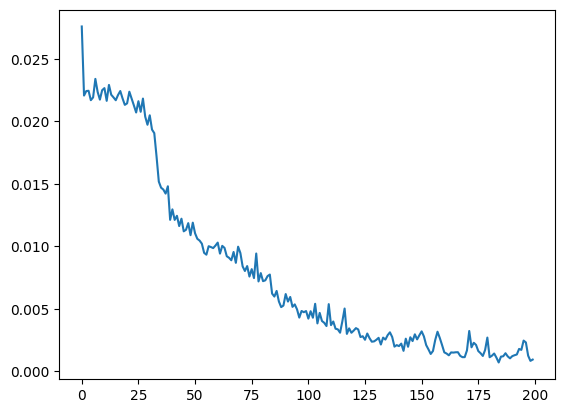

In [ ]:
model, history = fcasts(data,1,5,200) # Unpack the returned values into two variables
loss_per_epoch = history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.show()

Epoch 1/250
91/91 - 10s - loss: 0.0232 - 10s/epoch - 111ms/step
Epoch 2/250
91/91 - 9s - loss: 0.0235 - 9s/epoch - 96ms/step
Epoch 3/250
91/91 - 6s - loss: 0.0223 - 6s/epoch - 70ms/step
Epoch 4/250
91/91 - 8s - loss: 0.0224 - 8s/epoch - 87ms/step
Epoch 5/250
91/91 - 6s - loss: 0.0223 - 6s/epoch - 66ms/step
Epoch 6/250
91/91 - 6s - loss: 0.0235 - 6s/epoch - 66ms/step
Epoch 7/250
91/91 - 8s - loss: 0.0223 - 8s/epoch - 84ms/step
Epoch 8/250
91/91 - 7s - loss: 0.0224 - 7s/epoch - 74ms/step
Epoch 9/250
91/91 - 6s - loss: 0.0216 - 6s/epoch - 65ms/step
Epoch 10/250
91/91 - 8s - loss: 0.0226 - 8s/epoch - 91ms/step
Epoch 11/250
91/91 - 6s - loss: 0.0219 - 6s/epoch - 67ms/step
Epoch 12/250
91/91 - 8s - loss: 0.0207 - 8s/epoch - 91ms/step
Epoch 13/250
91/91 - 6s - loss: 0.0217 - 6s/epoch - 68ms/step
Epoch 14/250
91/91 - 6s - loss: 0.0217 - 6s/epoch - 64ms/step
Epoch 15/250
91/91 - 8s - loss: 0.0212 - 8s/epoch - 83ms/step
Epoch 16/250
91/91 - 8s - loss: 0.0209 - 8s/epoch - 90ms/step
Epoch 17/250
9

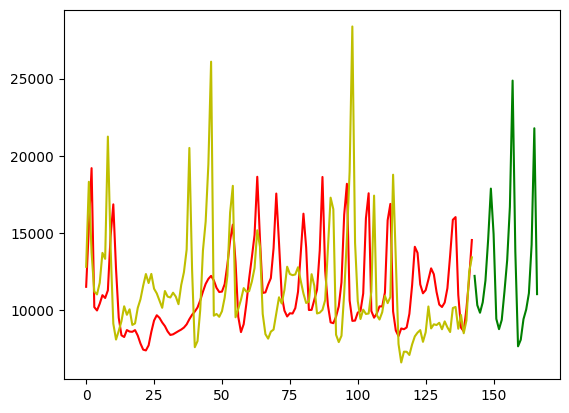

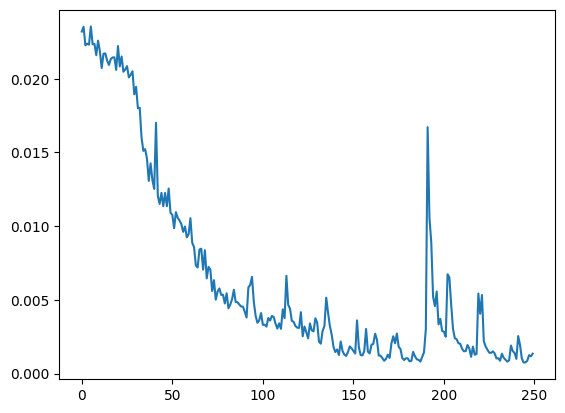

In [ ]:
model, history = fcasts(data,1,5,250) # Unpack the returned values into two variables
loss_per_epoch = history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.show()

In [ ]:
model, history = fcasts(data,1,5,300) # Unpack the returned values into two variables
loss_per_epoch = history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.show()